# Task 1: A first closer look at the Cahn-Hilliard equation

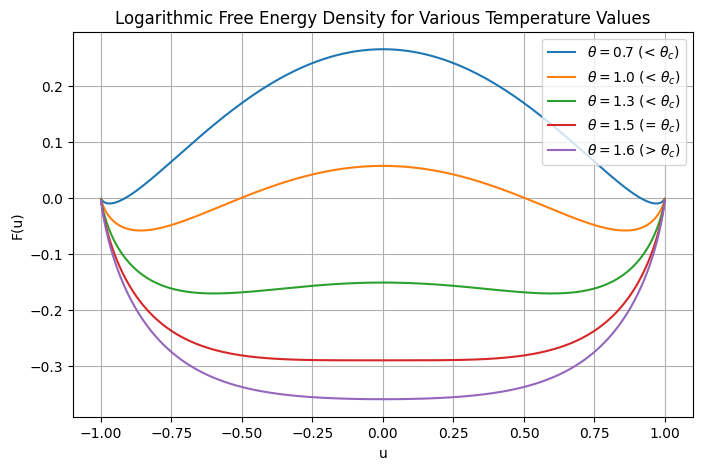

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logarithmic free energy density function
def F_log(u, theta, theta_c=1.5):
    # To avoid log(0) issues, ensure u is strictly inside (-1,1)
    return (theta_c / 2) * (1 - u**2) + (theta / 2) * ((1 - u) * np.log((1 - u)/2) + (1 + u) * np.log((1 + u)/2))

# Create a grid in u, avoiding the endpoints -1 and 1
u = np.linspace(-0.999, 0.999, 500)

# Define theta values for the three regimes
theta_values = {
    r'$\theta=0.7$ (< $\theta_c$)': 0.7,
    r'$\theta=1.0$ (< $\theta_c$)': 1.0,
    r'$\theta=1.3$ (< $\theta_c$)': 1.3,
    r'$\theta=1.5$ (= $\theta_c$)': 1.5,
    r'$\theta=1.6$ (> $\theta_c$)': 1.6
}

plt.figure(figsize=(8,5))
for label, theta in theta_values.items():
    plt.plot(u, F_log(u, theta), label=label)

plt.xlabel('u')
plt.ylabel('F(u)')
plt.title('Logarithmic Free Energy Density for Various Temperature Values')
plt.legend()
plt.grid(True)
plt.show()


### Invariance under the Transformation $u \mapsto -u$

We start by observing that $$f(-u) \; = \; (-u)^3 \, - \, (-u) \; = \; -u^3 \, + \, u \; = -(u^3 \, - \, u) \; = \; -f(u)$$
and that for any $C^2$ function $g$, we have that $ \; \nabla(-g) \; = \; -\nabla g \; $ and $ \; \Delta(-g) \; = \; -\Delta g \;$. We now assume that $u$ is a solution for the Cahn-Hillard equation and observe that

$$ 
\begin{align}
& \partial_tu \; - \; \nabla \cdot  (\,M\nabla(\,f(u)-\kappa\Delta u\,) \;= \; 0 \\
\Rightarrow  &\;-\, \partial_tu \; -(- \; \nabla \cdot  (\,M\nabla(\,f(u)-\kappa\Delta u\,)) \; = \; 0 \\
\Rightarrow  &\;\, \partial_t(-u) \; -\; \nabla \cdot  (\,M\nabla(\,-f(u)-(-\kappa\Delta u\,))) \; = \; 0 \\
\Rightarrow  &\;\, \partial_t(-u) \; -\; \nabla \cdot  (\,M\nabla(\,f(-u)-\kappa\Delta (-u)\,)) \; = \; 0
\end{align}
$$
We see that $-u$ satisfies the Cahn-Hillard equation which conludes the proof $\; \blacksquare$

### Mass Conservation
We start by assuming that $u$ is a solution for the Cahn-Hillard equation that is periodic on a rectangular domain 
$\Omega \, = \, [0,L_x) \times [0,L_y)$.
We observing that
$$
\frac{d}{dt} \int_\Omega u(\textbf{x},t) \, d\textbf{x} \; = \; \int_\Omega \partial_t\, u \, d\textbf{x} \; = \; \int_\Omega \nabla \cdot \, (M\nabla \mu)  \, d\textbf{x} \\
$$
We now use the divergence theorem, which gives us
$$
\begin{align}
\int_\Omega \nabla \cdot \, (M\nabla \mu)  \, d\textbf{x} \; = \; \oint_{\partial\Omega} \, (M\nabla \mu) \cdot n \; dS
\end{align}
$$
We now need to integrate over the boundary of the rectangle $\Omega$, we do this by integrating over it's four edges. The integral for the edge where $x\,=\,0$ has outward normal $(-1,0)$ and the integral where $x\,=\,L_x$ has outward normal $(1,0)$. These two integrals become
$$
\int_{0}^{L_y} \, M\nabla \mu(L_x,y) \cdot (1,0) \; dy \; - \; \int_{0}^{L_y} \, M\nabla \mu(0,y) \cdot (1,0) \; dy
$$
Since we have periodic boundary conditions, we get that $\; \mu(L_x,y) \, = \, \mu(0,y) \; \forall \,y\;$. We then see that the two integrals cancel out. For the integrals with edges $y=0$ and $L_y=0$ we get
$$
\int_{0}^{L_x} \, M\nabla \mu(x,L_y) \cdot (0,1) \; dx \; - \; \int_{0}^{L_x} \, M\nabla \mu(x,0) \cdot (0,1) \; dx
$$

Which, for the same reason, also cancel out. This means that the the four integrals cancel out and we get that
$$
\frac{d}{dt} \int_\Omega u(\textbf{x},t) \, d\textbf{x} \; = \; \oint_{\partial\Omega} \, (M\nabla \mu) \cdot n \; dS \; = \; 0
$$
This proves that when $u$ is a solution for the Cahn-Hillard equation that is periodic on a rectangular domain 
$\Omega \, = \, [0,L_x) \times [0,L_y)$, it is also mass conservative $\; \blacksquare$

# Task 2: A spectral solver for the biharmonic equation

Test Case 1, Nx =  4, Ny =  8  --> max error = 6.33e+03
Test Case 1, Nx =  8, Ny = 16  --> max error = 2.37e+01
Test Case 1, Nx = 15, Ny = 30  --> max error = 5.14e-01
Test Case 1, Nx = 16, Ny = 32  --> max error = 5.88e-15
Test Case 1, Nx = 20, Ny = 40  --> max error = 7.99e-14
Test Case 1, Nx = 32, Ny = 64  --> max error = 5.14e-14

EOC for Test Case 1:
From Nx=4 to Nx=8: EOC ≈ 8.06
From Nx=8 to Nx=15: EOC ≈ 6.09
From Nx=15 to Nx=16: EOC ≈ 497.38
From Nx=16 to Nx=20: EOC ≈ -11.69
From Nx=20 to Nx=32: EOC ≈ 0.94


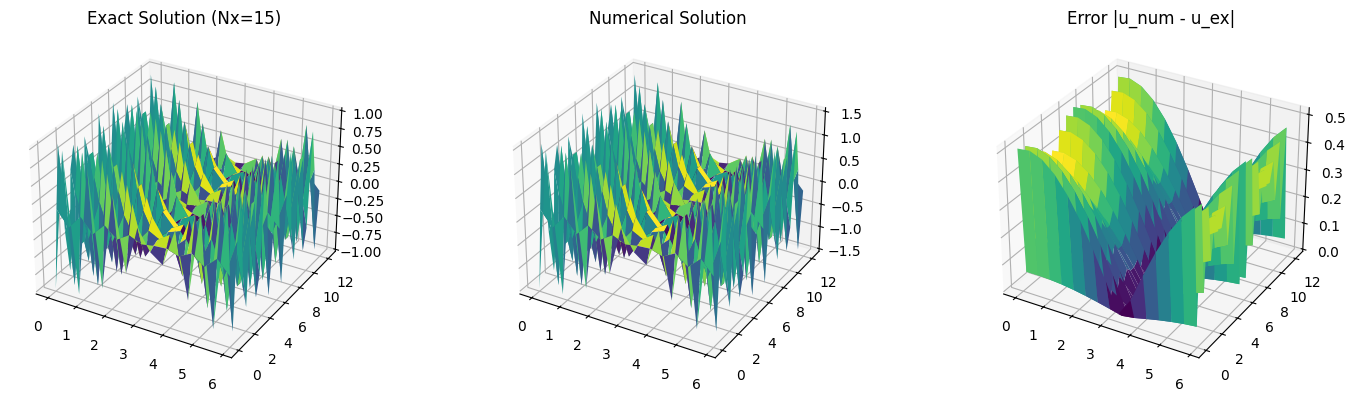

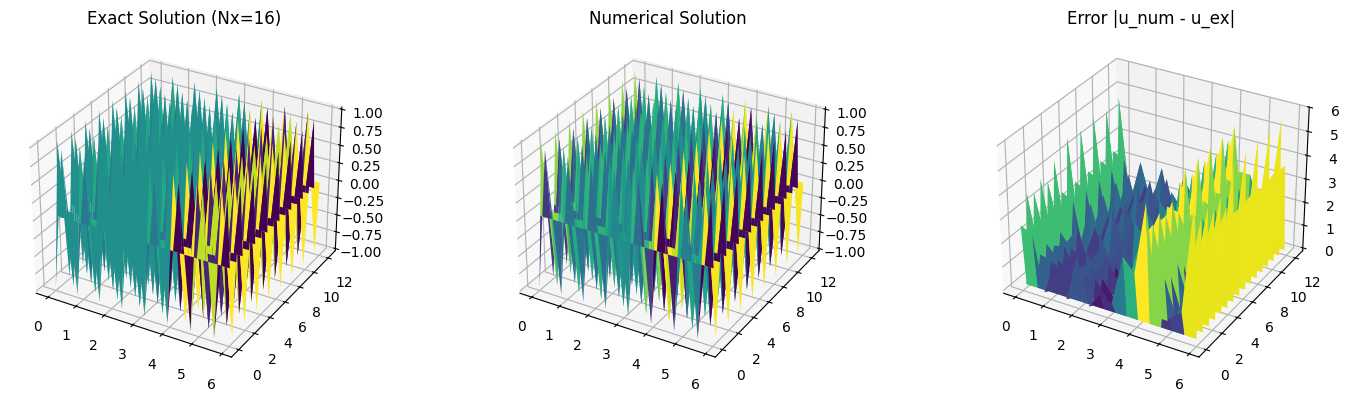

Test Case 2, Nx =  4, Ny =  8  --> max error = 2.02e+01
Test Case 2, Nx =  8, Ny = 16  --> max error = 1.06e+01
Test Case 2, Nx = 12, Ny = 24  --> max error = 9.84e-01
Test Case 2, Nx = 16, Ny = 32  --> max error = 3.46e-02
Test Case 2, Nx = 20, Ny = 40  --> max error = 9.93e-04
Test Case 2, Nx = 24, Ny = 48  --> max error = 3.60e-05
Test Case 2, Nx = 28, Ny = 56  --> max error = 1.51e-06
Test Case 2, Nx = 32, Ny = 64  --> max error = 6.31e-08
Test Case 2, Nx = 36, Ny = 72  --> max error = 2.53e-09
Test Case 2, Nx = 40, Ny = 80  --> max error = 9.63e-11

EOC for Test Case 2:
From Nx=4 to Nx=8: EOC ≈ 0.93
From Nx=8 to Nx=12: EOC ≈ 5.87
From Nx=12 to Nx=16: EOC ≈ 11.64
From Nx=16 to Nx=20: EOC ≈ 15.92
From Nx=20 to Nx=24: EOC ≈ 18.19
From Nx=24 to Nx=28: EOC ≈ 20.59
From Nx=28 to Nx=32: EOC ≈ 23.76
From Nx=32 to Nx=36: EOC ≈ 27.31
From Nx=36 to Nx=40: EOC ≈ 31.02


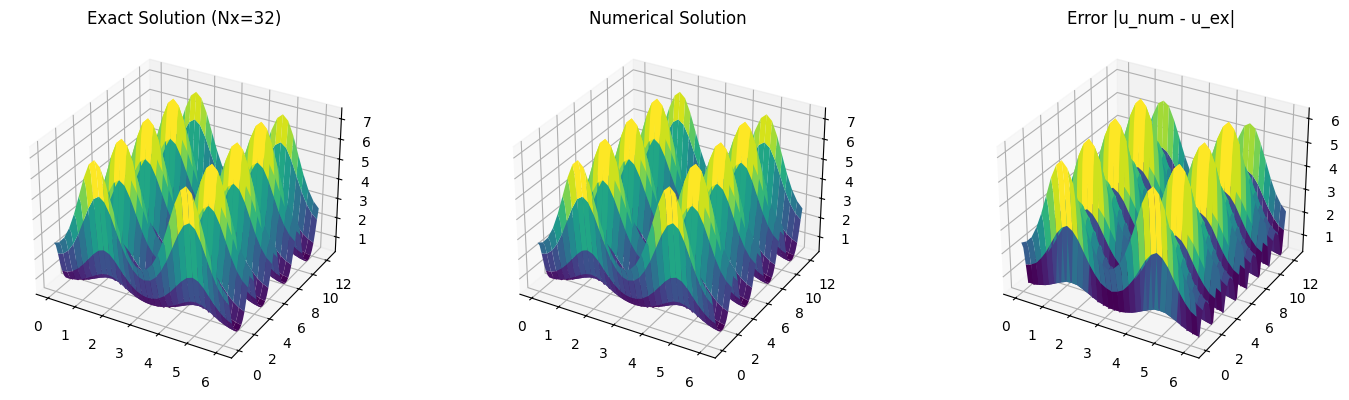

In [3]:
from numpy.fft import fft2, ifft2, fftfreq
import sympy as sp

def biharmonic_solver(X, Y, F, c, mean=0.0):
    """
    Solve the biharmonic equation in 2D using the spectral method.

    Parameters:
        X (ndarray): 2D array of x-coordinates.
        Y (ndarray): 2D array of y-coordinates.
        F (ndarray): 2D array representing the right-hand side of the biharmonic equation.
        c (float): Constant coefficient in the biharmonic equation.
        mean (float, optional): Desired mean value of the solution in case c = 0. Default is 0.0.

    Returns:
        U (ndarray): 2D array representing the solution to the biharmonic equation.
    """
    Ny, Nx = F.shape
    # Determine grid spacing and domain lengths from the unique grid values.
    x_unique = X[0, :]
    y_unique = Y[:, 0]
    dx = x_unique[1] - x_unique[0]
    dy = y_unique[1] - y_unique[0]
    Lx = x_unique[-1] - x_unique[0] + dx
    Ly = y_unique[-1] - y_unique[0] + dy

    # Compute Fourier wave numbers (angular frequencies)
    kx = 2 * np.pi * fftfreq(Nx, d=dx)
    ky = 2 * np.pi * fftfreq(Ny, d=dy)
    KX, KY = np.meshgrid(kx, ky, indexing='xy')
    k2 = KX**2 + KY**2

    denom = k2**2 + c
    # Protect the zero mode (k==0) to avoid division by zero:
    denom[0, 0] = 1.0
    F_hat = fft2(F)
    u_hat = F_hat / denom
    # Enforce the desired mean if c is nearly zero:
    tol = 1e-10
    nonzero_k = np.sqrt(k2)
    nonzero_k = nonzero_k[nonzero_k > 0]
    if nonzero_k.size > 0:
        min_k = np.min(nonzero_k)
    else:
        min_k = 1.0
    if c < tol * (min_k**4):
        u_hat[0, 0] = mean * (Nx * Ny)

    # Handle the zero mode when c is (effectively) 0.
    tol = 1e-10
    nonzero_k = np.sqrt(k2)
    nonzero_k = nonzero_k[nonzero_k > 0]
    if nonzero_k.size > 0:
        min_k = np.min(nonzero_k)
    else:
        min_k = 1.0
    # If c is much smaller than the smallest nonzero mode^4, override the zero mode.
    if c < tol * (min_k**4):
        u_hat[0, 0] = mean * (Nx * Ny)

    # Inverse FFT to get the solution in physical space.
    u = np.real(ifft2(u_hat))
    return u


def test_case1(Nx):
    Lx = 2 * np.pi
    Ly = 4 * np.pi
    Ny = 2 * Nx 
    x = np.linspace(0, Lx, Nx, endpoint=False)
    y = np.linspace(0, Ly, Ny, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    
    # Manufactured solution and corresponding RHS
    u_exact = np.sin(8*(X - 1)) * np.cos(4*Y)
    f = 6401 * u_exact
    c = 1.0
    # Solve
    u_num = biharmonic_solver(X, Y, f, c)
    error = np.max(np.abs(u_num - u_exact))
    return error, X, Y, u_exact, u_num


# Define the symbolic expressions:
x_sym, y_sym = sp.symbols('x y', real=True)
u_expr = sp.exp(sp.sin(x_sym)**2 + sp.cos(2*y_sym))
# Compute Laplacian of u
u_xx_expr = sp.diff(u_expr, x_sym, 2)
u_yy_expr = sp.diff(u_expr, y_sym, 2)
lap_expr = u_xx_expr + u_yy_expr
# Compute biharmonic (Laplacian squared)
lap2_expr = sp.diff(lap_expr, x_sym, 2) + sp.diff(lap_expr, y_sym, 2)
f_expr = sp.simplify(lap2_expr)
# Create a numerical function from the symbolic expression.
f_func = sp.lambdify((x_sym, y_sym), f_expr, 'numpy')

def test_case2(Nx):
    Lx = 2 * np.pi
    Ly = 4 * np.pi
    Ny = 2 * Nx 
    x = np.linspace(0, Lx, Nx, endpoint=False)
    y = np.linspace(0, Ly, Ny, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    
    u_exact = np.exp(np.sin(X)**2 + np.cos(2*Y))
    u_mean = np.mean(u_exact)
    f = f_func(X, Y)
    c = 0.0
    # Solve with prescribed mean (since the solution is determined up to an additive constant)
    u_num = biharmonic_solver(X, Y, f, c, mean=u_mean)
    error = np.max(np.abs(u_num - u_exact))
    return error, X, Y, u_exact, u_num


# Convergence study for Test Case 1
Nx_vals_tc1 = [4, 8, 15, 16, 20, 32]
errors_tc1 = []
for Nx in Nx_vals_tc1:
    err, X, Y, u_ex, u_num = test_case1(Nx)
    errors_tc1.append(err)
    print(f"Test Case 1, Nx = {Nx:2d}, Ny = {2*Nx:2d}  --> max error = {err:.2e}")

# Compute experimental order of convergence (EOC) between successive resolutions.
print("\nEOC for Test Case 1:")
for i in range(1, len(errors_tc1)):
    EOC = np.log(errors_tc1[i-1]/errors_tc1[i]) / np.log( (Nx_vals_tc1[i]/Nx_vals_tc1[i-1]) )
    print(f"From Nx={Nx_vals_tc1[i-1]} to Nx={Nx_vals_tc1[i]}: EOC ≈ {EOC:.2f}")

# Surface plots for Test Case 1:
for Nx in [15, 16]:
    err, X, Y, u_ex, u_num = test_case1(Nx)
    fig = plt.figure(figsize=(15, 4))
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, u_ex, cmap='viridis')
    ax1.set_title(f"Exact Solution (Nx={Nx})")
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, u_num, cmap='viridis')
    ax2.set_title("Numerical Solution")
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, np.abs(u_ex-u_num), cmap='viridis')
    ax3.set_title("Error |u_num - u_ex|")
    plt.tight_layout()
    plt.show()

# Convergence study for Test Case 2
Nx_vals_tc2 = [4 + 4*k for k in range(10)]
errors_tc2 = []
for Nx in Nx_vals_tc2:
    err, X, Y, u_ex, u_num = test_case2(Nx)
    errors_tc2.append(err)
    print(f"Test Case 2, Nx = {Nx:2d}, Ny = {2*Nx:2d}  --> max error = {err:.2e}")

print("\nEOC for Test Case 2:")
for i in range(1, len(errors_tc2)):
    EOC = np.log(errors_tc2[i-1]/errors_tc2[i]) / np.log( (Nx_vals_tc2[i]/Nx_vals_tc2[i-1]) )
    print(f"From Nx={Nx_vals_tc2[i-1]} to Nx={Nx_vals_tc2[i]}: EOC ≈ {EOC:.2f}")

# Surface plot for Test Case 2:
Nx = 32
err, X, Y, u_ex, u_num = test_case2(Nx)
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, u_ex, cmap='viridis')
ax1.set_title(f"Exact Solution (Nx={Nx})")
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, u_num, cmap='viridis')
ax2.set_title("Numerical Solution")
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, np.abs(u_ex-u_num), cmap='viridis')
ax3.set_title("Error |u_num - u_ex|")
plt.tight_layout()
plt.show()


# Task 3: A spectral solver for the transient biharmonic equation

We want to solve the transient biharmonic equation

$$
\partial_t u + \kappa \Delta^2 u = g, \quad u(0,x,y) = u_0(x,y),
$$

on a rectangular domain $\Omega = [L_x^-, L_x^+] \times [L_y^-, L_y^+]$ with periodic boundary conditions. In Fourier space the biharmonic operator diagonalizes. Writing the discrete Fourier transform of $u$ as

$$
\hat{u}(t, k_x, k_y),
$$

the Fourier transform of the biharmonic operator is given by

$$
\mathcal{F}\{\Delta^2 u\}(k_x, k_y) = |k|^4 \hat{u}(t, k_x, k_y),
$$

where the "frequency" $|k|^4$ is computed from the wave numbers $k_x, k_y$.

Thus, in Fourier space our PDE reads

$$
\frac{d}{dt}\hat{u} + \kappa |k|^4 \hat{u} = \hat{g}(t, k_x, k_y).
$$

Defining

$$
\lambda = -\kappa |k|^4,
$$

this is a linear ODE in time:

$$
\frac{d}{dt}\hat{u} = \lambda \hat{u} + \hat{g}.
$$

### The $\theta$-Method

For a general ODE

$$
\frac{dU}{dt} = F(t, U),
$$

with time step $\tau$ and letting $z = \tau\lambda$, the $\theta$-method is given by

$$
U^{n+1} = U^n + \tau\left(\theta F(t_{n+1}, U^{n+1}) + (1-\theta)F(t_n, U^n)\right).
$$

For our ODE the update in Fourier space becomes

$$
\hat{u}^{n+1} = \hat{u}^n + \tau\left(\theta [\lambda \hat{u}^{n+1} + \hat{g}^{n+1}] + (1-\theta)[\lambda \hat{u}^n + \hat{g}^n]\right).
$$

Rearranging, we obtain the update formula:

$$
\hat{u}^{n+1} = \frac{1 + \tau(1-\theta)\lambda}{1 - \tau\theta\lambda} \hat{u}^n + \frac{\tau(\theta \hat{g}^{n+1} + (1-\theta)\hat{g}^n)}{1 - \tau\theta\lambda}.
$$

Recalling that $\lambda = -\kappa |k|^4$, the update is written as

$$
\hat{u}^{n+1} = \frac{1 - \tau(1-\theta)\kappa|k|^4}{1 + \tau\theta\kappa|k|^4} \hat{u}^n + \frac{\tau(\theta \hat{g}^{n+1} + (1-\theta)\hat{g}^n)}{1 + \tau\theta\kappa|k|^4}.
$$

This formula is computed mode by mode (i.e. for each pair $(k_x, k_y)$). In the absence of a source term (i.e. if $g \equiv 0$), the update simplifies to

$$
\hat{u}^{n+1} = r_\theta(z) \hat{u}^n, \quad \text{with } r_\theta(z) = \frac{1 - \tau(1-\theta)\kappa|k|^4}{1 + \tau\theta\kappa|k|^4}.
$$

### Butcher Tableau and Consistency

One may rewrite the $\theta$-method as a 2-stage Runge-Kutta method for a linear problem. For the ODE $\dot{U} = \lambda U$, the method reads:

$$
U^{n+1} = U^n + \tau\left(\theta \lambda U^{n+1} + (1-\theta)\lambda U^n\right).
$$

This can be interpreted as a 2-stage scheme with the following tableau:

$$
\begin{array}{c|cc}
0 & 0 & 0 \\
1 & 1-\theta & \theta \\
\hline
 & 1-\theta & \theta \\
\end{array}
$$

In this formulation:

- When $\theta = 0$, the method reduces to the explicit Euler method.
- When $\theta = 1$, it becomes the implicit Euler method.
- When $\theta = \frac{1}{2}$, the scheme is equivalent to the Crank-Nicolson method.

### Stability Function

For the linear test equation $\dot{U} = \lambda U$ the stability function is given by

$$
r_\theta(z) = \frac{1 + (1-\theta)z}{1 - \theta z}, \quad z = \tau\lambda.
$$

The stability region $S_\theta$ is defined by $\{z \in \mathbb{C} : |r_\theta(z)| \leq 1\}$. In particular:

- For $\theta = 1/2$ (Crank-Nicolson), the method is A-stable.
- For $\theta = 1$ (implicit Euler), the method is A-stable.
- For $\theta = 0$ (explicit Euler), the method is only conditionally stable. In this case, stability requires

$$
|1 + z| \leq 1,
$$

which restricts the time step $\tau$ relative to the highest frequency present.

The stability region is a circle in the complex plane whose center and radius depend on $\theta$. One may prove that for $\theta \geq \frac{1}{2}$ the method is A-stable.

In [4]:
def transient_biharmonic_solver(*, kappa, X, Y, U0, t0, T, Nt, theta=0.5, g=None):
    """
    Solve the transient biharmonic equation using the theta method.

    Parameters:
    ----------- 
    kappa (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U0 (ndarray): Initial condition array.
    t0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """
    Ny, Nx = U0.shape
    x = X[0, :]
    y = Y[:, 0]
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    
    # Compute Fourier wave numbers and K4
    kx = 2 * np.pi * fftfreq(Nx, d=dx)
    ky = 2 * np.pi * fftfreq(Ny, d=dy)
    KX, KY = np.meshgrid(kx, ky, indexing='xy')
    K4 = (KX**2 + KY**2)**2

    dt = (T - t0) / Nt
    t = t0

    U_hat = fft2(U0)
    yield U_hat, t

    for n in range(Nt):
        t_old = t
        t = t_old + dt
        
        # Evaluate source term at t_old and t.
        if g is None:
            G_old = np.zeros_like(U0, dtype=complex)
            G_new = G_old
        else:
            G_old = fft2(g(X, Y, t_old))
            G_new = fft2(g(X, Y, t))
        
        denominator = 1 + dt * theta * kappa * K4
        denominator[0, 0] = 1.0  # Protect zero mode.
        with np.errstate(over='ignore', invalid='ignore'):
            num = 1 - dt * (1 - theta) * kappa * K4
            U_hat = (num / denominator) * U_hat + (dt * (theta * G_new + (1 - theta) * G_old)) / denominator

        yield U_hat, t


def compute_N_CFL(N, kappa=1, t0=0, T=1):
    """
    Compute the minimal number of time steps (N_CFL) needed for stability (CFL condition)
    for the explicit Euler case (theta = 0).
    """
    x = np.linspace(-np.pi, np.pi, N, endpoint=False)
    y = np.linspace(-np.pi, np.pi, N, endpoint=False)
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    kx = 2*np.pi*fftfreq(N, d=dx)
    ky = 2*np.pi*fftfreq(N, d=dy)
    KX, KY = np.meshgrid(kx, ky, indexing='xy')
    K4 = (KX**2 + KY**2)**2
    K4_max = np.max(K4)
    dt_max = 2 / (kappa * K4_max)
    N_CFL = int(np.ceil((T-t0)/dt_max))
    print(f"Computed CFL: dt_max = {dt_max:.2e}, minimal Nt = {N_CFL}")
    return N_CFL


def get_manufactured_source_complex_func(kappa=1):
    """
    Compute and return a function g(x,y,t) for the complex manufactured solution.
    """
    x_sym, y_sym, t_sym = sp.symbols('x y t', real=True)
    u_expr = (sp.exp(1 + sp.sin(x_sym)**2) + sp.exp(1 + sp.cos(y_sym)**2)) * sp.exp(-4 * kappa * t_sym)
    u_t_expr = sp.diff(u_expr, t_sym)
    lap_expr = sp.diff(u_expr, x_sym, 2) + sp.diff(u_expr, y_sym, 2)
    lap2_expr = sp.diff(lap_expr, x_sym, 2) + sp.diff(lap_expr, y_sym, 2)
    g_expr = sp.simplify(u_t_expr + kappa * lap2_expr)
    g_func = sp.lambdify((x_sym, y_sym, t_sym), g_expr, 'numpy')
    return g_func

g_complex_func = get_manufactured_source_complex_func(kappa=1)

def manufactured_solution_complex(X, Y, t, kappa=1):

    return (np.exp(1 + np.sin(X)**2) + np.exp(1 + np.cos(Y)**2)) * np.exp(-4 * kappa * t)

def manufactured_source_complex(X, Y, t, kappa=1):

    return g_complex_func(X, Y, t)

def convergence_study(theta, Nt_values, N=20, kappa=1, case='simple', verbose=True):

    x = np.linspace(-np.pi, np.pi, N, endpoint=False)
    y = np.linspace(-np.pi, np.pi, N, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    t0, T = 0.0, 1.0
    
    if case == 'simple':
        u_exact_func = lambda X,Y,t: np.sin(X)*np.cos(Y)*np.exp(-4*kappa*t)
        g_func = lambda X,Y,t: np.zeros_like(X)
    elif case == 'complex':
        u_exact_func = manufactured_solution_complex
        g_func = lambda X,Y,t: manufactured_source_complex(X,Y,t,kappa)
    else:
        raise ValueError(f"Invalid case '{case}'. Choose 'simple' or 'complex'")
    
    # Initialize solution
    U0 = u_exact_func(X, Y, t0)
    errors = []
    
    for Nt in Nt_values:
        # Run solver
        solver = transient_biharmonic_solver(
            kappa=kappa, X=X, Y=Y, U0=U0,
            t0=t0, T=T, Nt=Nt, theta=theta,
            g=g_func
        )
        
        # Get final solution
        for U_hat, t in solver:
            u_num = np.real(ifft2(U_hat))
        
        # Compute error
        u_ex = u_exact_func(X, Y, T)
        err = np.max(np.abs(u_num - u_ex))
        errors.append(err)
        
        if verbose:
            print(f"{case.capitalize()}: theta={theta:.2f}, Nt={Nt:4d}, error={err:.2e}")
    
    return Nt_values, errors

# Testing:

Nt_values_list = [10, 20, 40, 80, 160, 320, 640] 

print("Convergence study for theta = 1 (implicit Euler):")
convergence_study(theta=1.0, Nt_values=Nt_values_list, case='simple')

print("\nConvergence study for theta = 0.5 (Crank-Nicolson):")
convergence_study(theta=0.5, Nt_values=Nt_values_list, case='simple')

print("\n")
N_CFL = compute_N_CFL(N=20, kappa=1, t0=0, T=1)
Nt_explicit = [int(0.5 * N_CFL), N_CFL, int(2 * N_CFL), int(4 * N_CFL)]
print("Convergence study for theta = 0 (explicit Euler):")
convergence_study(theta=0.0, Nt_values=Nt_explicit, case='simple')

print("\nConvergence study for complex manufactured solution, theta = 0.5:")
Nt_vals, errors = convergence_study(theta=0.5, Nt_values=Nt_values_list, N=20, kappa=1, case='complex')


Convergence study for theta = 1 (implicit Euler):
Simple: theta=1.00, Nt=  10, error=1.63e-02
Simple: theta=1.00, Nt=  20, error=7.77e-03
Simple: theta=1.00, Nt=  40, error=3.78e-03
Simple: theta=1.00, Nt=  80, error=1.86e-03
Simple: theta=1.00, Nt= 160, error=9.23e-04
Simple: theta=1.00, Nt= 320, error=4.60e-04
Simple: theta=1.00, Nt= 640, error=2.29e-04

Convergence study for theta = 0.5 (Crank-Nicolson):
Simple: theta=0.50, Nt=  10, error=9.74e-04
Simple: theta=0.50, Nt=  20, error=2.44e-04
Simple: theta=0.50, Nt=  40, error=6.10e-05
Simple: theta=0.50, Nt=  80, error=1.53e-05
Simple: theta=0.50, Nt= 160, error=3.82e-06
Simple: theta=0.50, Nt= 320, error=9.54e-07
Simple: theta=0.50, Nt= 640, error=2.38e-07


Computed CFL: dt_max = 5.00e-05, minimal Nt = 20000
Convergence study for theta = 0 (explicit Euler):
Simple: theta=0.00, Nt=10000, error=nan
Simple: theta=0.00, Nt=20000, error=7.33e-06
Simple: theta=0.00, Nt=40000, error=3.66e-06
Simple: theta=0.00, Nt=80000, error=1.83e-06

C

For theta = 1, the implicit Euler method shows first-order convergence; error roughly halves when doubling Nt. 

For theta = 0.5, The Crank–Nicolson method shows second-order convergence; error decreases by about a factor of 4 when doubling Nt. 

For theta = 0, The explicit Euler method is only conditionally stable for Nt ≥ 20000 to satisfy the CFL condition. For Nt ≥ 20000 the convergence rate is first order. 

The complex manufactured solution has inherently larger errors due to stronger nonlinear effects (for Nt=10), but the convergence rate remains second order where the error decreases by about a factor of 4 when doubling Nt. 


# Task 4

We have the Cahn-Hilliard equation
$$
\partial_t u - \nabla \cdot (\nabla(f(u) - \kappa \Delta u)) = g(x,y,t),
$$

with

$$
f(u) = u^3 - u.
$$

$$
\Delta f(u) = \Delta(u^3 - u) = \Delta u^3 - \Delta u.
$$

We split this as

$$
\Delta(u^3 - u) = \underbrace{a \Delta u}_{\text{treated implicitly}} + \underbrace{\Delta u^3 - (1+a)\Delta u}_{\text{treated explicitly}},
$$

where $a \geq 0$ is a parameter; a typical choice is $a=1.5$ (for $a \geq 2$ the splitting is "convex"). With this splitting the Cahn-Hilliard equation is rewritten as

$$
\partial_t u + \kappa \Delta^2 u - a \Delta u = \Delta[(u)^3 - (1+a)u] + g(x,y,t).
$$

Let the time step be $\tau$ so that $t_n = t_0 + n\tau$. For each time step we approximate the time derivative by backward Euler:

$$
\frac{u^{n+1} - u^n}{\tau}.
$$
The IMEX scheme for the Cahn-Hilliard equation:

$$
\frac{u^{n+1} - u^n}{\tau} + \kappa \Delta^2 u^{n+1} - a \Delta u^{n+1} - g^{n+1} = \Delta[(u^n)^3 - (1+a)u^n].
$$

The Fourier transform of the Laplacian is given by

$$
\mathcal{F}\{\Delta u\}(k) = -|k|^2 \hat{u}(k)
$$

and for the biharmonic operator

$$
\mathcal{F}\{\Delta^2 u\}(k) = |k|^4 \hat{u}(k).
$$

Thus, if we denote the DFT of $u^n$ by $\hat{u}^n$ and define

$$
K_2 = |k|^2, \quad K_4 = (|k|^2)^2,
$$

the scheme in Fourier space becomes:

$$
\frac{\hat{u}^{n+1} - \hat{u}^n}{\tau} + \kappa K_4 \hat{u}^{n+1} + a K_2 \hat{u}^{n+1} - \hat{g}^{n+1} = -K_2 \widehat{((u^n)^3 - (1+a)u^n)}.
$$

Solving for $\hat{u}^{n+1}$ we obtain the update formula

$$
\hat{u}^{n+1} = \frac{\hat{u}^n + \tau \hat{g}^{n+1} - \tau K_2 \widehat{((u^n)^3 - (1+a)u^n)}}{1 + \tau (\kappa K_4 + a K_2)}.
$$

In practice, we implement a pseudo-spectral method: at each time step we

1. Transform $\hat{u}^n$ back to physical space,
2. Compute the nonlinearity $(u^n)^3 - (1+a)u^n$ there,
3. Transform it back to Fourier space,
4. Update $\hat{u}^{n+1}$ using the formula above.

In [5]:
def cahn_hilliard_backward_euler(*, 
                                 kappa, 
                                 X, Y, U0, 
                                 t0, T, Nt,
                                 g, 
                                 alpha=1.5):
    """
    Implements the Cahn-Hilliard equation solver using the backward Euler method 
    with a convex-concave splitting approach.

    Parameters:
    -----------
    kappa : float
        Diffusion coefficient for the biharmonic operator.
    X : ndarray
        2D array representing the x-coordinates of the grid.
    Y : ndarray
        2D array representing the y-coordinates of the grid.
    U0 : ndarray
        Initial condition for the solution.
    t0 : float
        Initial time.
    T : float
        Final time.
    Nt : int
        Number of time steps.
    g : callable or None
        Source term as a function of (X, Y, t). If None, no source term is applied.
    alpha : float, optional
        Convex-concave splitting parameter. Default is 1.5.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.

    """
    Ny, Nx = U0.shape
    x = X[0, :]
    y = Y[:, 0]
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    Lx = x[-1] + dx - x[0]
    Ly = y[-1] + dy - y[0]
    
    kx = 2 * np.pi * fftfreq(Nx, d=dx)
    ky = 2 * np.pi * fftfreq(Ny, d=dy)
    KX, KY = np.meshgrid(kx, ky, indexing='xy')
    K2 = KX**2 + KY**2
    K4 = K2**2

    dt = (T-t0)/Nt
    t = t0

    # Compute DFT of initial condition.
    U_hat = fft2(U0)
    yield U_hat, t  # yield the initial state

    for n in range(Nt):
        t_old = t
        t = t_old + dt
        
        # Evaluate source term g at new time (treated implicitly)
        if g is None:
            G_new = np.zeros_like(U0, dtype=complex)
        else:
            g_new = g(X, Y, t)
            G_new = fft2(g_new)
        
        # Transform U_hat back to physical space
        u_old = np.real(ifft2(U_hat))
        # Compute the nonlinear term in physical space
        nonlin = (u_old)**3 - (1+alpha)*u_old
        # Transform the nonlinear term to Fourier space
        Nonlin_hat = fft2(nonlin)
        
        U_hat = (U_hat + dt * G_new - dt * K2 * Nonlin_hat) / (1 + dt*(kappa*K4 + alpha*K2))
        
        yield U_hat, t


# Define symbols
x_sym, y_sym, t_sym, kappa_sym, alpha_sym = sp.symbols('x y t kappa alpha', real=True)
u_ex_sym = sp.sin(x_sym)*sp.cos(y_sym)*sp.exp(-4*kappa_sym*t_sym)
# Compute time derivative
u_t_sym = sp.diff(u_ex_sym, t_sym)
# Compute Laplacian
u_xx_sym = sp.diff(u_ex_sym, x_sym, 2)
u_yy_sym = sp.diff(u_ex_sym, y_sym, 2)
lap_sym = u_xx_sym + u_yy_sym
# Biharmonic term
lap2_sym = sp.diff(lap_sym, x_sym, 2) + sp.diff(lap_sym, y_sym, 2)
# Nonlinear term
nonlin_sym = u_ex_sym**3 - (1+alpha_sym)*u_ex_sym
nonlin_lap_sym = sp.diff(nonlin_sym, x_sym, 2) + sp.diff(nonlin_sym, y_sym, 2)
g_sym = sp.simplify(u_t_sym + kappa_sym*lap2_sym - alpha_sym*lap_sym - nonlin_lap_sym)

# Create a numerical function for g
g_func = sp.lambdify((x_sym, y_sym, t_sym, kappa_sym, alpha_sym), g_sym, 'numpy')

def manufactured_source_CH(X, Y, t, kappa, alpha):
    return g_func(X, Y, t, kappa, alpha)

def manufactured_solution_CH(X, Y, t, kappa):
    return np.sin(X)*np.cos(Y)*np.exp(-4*kappa*t)

def convergence_study_CH(kappa, alpha, Nt_values, N=64):
    L = 16 * np.pi
    x = np.linspace(0, L, N, endpoint=False)
    y = np.linspace(0, L, N, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    t0 = 0.0
    T = 1.0
    
    # Manufactured initial condition
    U0 = manufactured_solution_CH(X, Y, t0, kappa)
    
    errors = []
    for Nt in Nt_values:
        solver = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0,
                                               t0=t0, T=T, Nt=Nt,
                                               g=lambda X, Y, t: manufactured_source_CH(X, Y, t, kappa, alpha),
                                               alpha=alpha)
        U_num = None
        for U_hat, t in solver:
            U_num = np.real(ifft2(U_hat))
        U_ex = manufactured_solution_CH(X, Y, T, kappa)
        err = np.max(np.abs(U_num - U_ex))
        errors.append(err)
        print(f"kappa={kappa:5.2f}, alpha={alpha:4.2f}, Nt={Nt:4d}, error = {err:.2e}")
    return Nt_values, errors


Nt_values = [100, 200, 400, 800, 1600, 3200]
print("\nConvergence study for kappa = 1.0:")
Nt_vals1, errors1 = convergence_study_CH(kappa=1.0, alpha=1.5, Nt_values=Nt_values, N=64)

print("\nConvergence study for kappa = 0.01:")
Nt_vals2, errors2 = convergence_study_CH(kappa=0.01, alpha=1.5, Nt_values=Nt_values, N=64)



Convergence study for kappa = 1.0:
kappa= 1.00, alpha=1.50, Nt= 100, error = 1.36e-02
kappa= 1.00, alpha=1.50, Nt= 200, error = 6.79e-03
kappa= 1.00, alpha=1.50, Nt= 400, error = 3.39e-03
kappa= 1.00, alpha=1.50, Nt= 800, error = 1.69e-03
kappa= 1.00, alpha=1.50, Nt=1600, error = 8.47e-04
kappa= 1.00, alpha=1.50, Nt=3200, error = 4.23e-04

Convergence study for kappa = 0.01:
kappa= 0.01, alpha=1.50, Nt= 100, error = 3.16e-03
kappa= 0.01, alpha=1.50, Nt= 200, error = 1.74e-03
kappa= 0.01, alpha=1.50, Nt= 400, error = 9.18e-04
kappa= 0.01, alpha=1.50, Nt= 800, error = 4.72e-04
kappa= 0.01, alpha=1.50, Nt=1600, error = 2.39e-04
kappa= 0.01, alpha=1.50, Nt=3200, error = 1.21e-04


Both cases show first order convergence as the error roughly halves when doubling the number of time steps. 
Lower kappa (0.01) results in lower errors compared to higher kappa (1.0) because the biharmonic term is less dominant.


# Task 5

# Second-Order Consistency of the 3-Stage Song IMEX Scheme

We are going to verify that the 3-stage Song IMEX scheme is second-order accurate. In other words, we show that the numerical update $ U^{(n+1)} $ produced by the scheme matches the Taylor expansion of the exact solution up to terms of $\mathcal{O}\tau^2 $, for the linear ODE

$$
U_t = L\,U + N\,U,
$$

where \(L\) and \(N\) are linear operators.

---

## Taylor Series of the Exact Solution

For a step size $\tau$, the exact solution at $t_{n+1} = t_n + \tau$ can be expanded as:

$$
\begin{aligned}
U(t_n+\tau) &= U(t_n) + \tau\,U_t(t_n) + \frac{\tau^2}{2}\,U_{tt}(t_n) + \mathcal{O}(\tau^3)\\[1mm]
&= U^n + \tau (L + N)U^n + \frac{\tau^2}{2}(L+N)^2 U^n + \mathcal{O}(\tau^3).
\end{aligned}
$$

Expanding the squared operator gives:

$$
(L+N)^2 = L^2 + L\,N + N\,L + N^2,
$$

thus the exact expansion becomes:

$$
U(t_n+\tau) = U^n + \tau(L+N)U^n + \frac{\tau^2}{2}(L^2 + L\,N + N\,L + N^2)U^n + \mathcal{O}(\tau^3).
$$

---

## The 3-Stage Song IMEX Scheme

The scheme consists of three stages:

### Stage 1

$$
U^{(1)} = U^n + \tau(L\,U^{(1)} + N\,U^n).
$$

### Stage 2

$$
U^{(2)} = \alpha_{10}\,U^n + \alpha_{11}\,U^{(1)} + \beta_1\tau(L\,U^{(2)} + N\,U^{(1)}),
$$

with coefficients (We chose to verify second-order accuracy by explicitly expanding each stage of the Song IMEX scheme using the first row coefficients. It is however possible to use a general proof or any of the other coefficients as well)

$$
\alpha_{10}=\frac{3}{2}, \quad \alpha_{11}=-\frac{1}{2}, \quad \beta_1=\frac{1}{2}.
$$

### Stage 3 (Final Update)

$$
U^{n+1} = \alpha_{20}\,U^n + \alpha_{21}\,U^{(1)} + \alpha_{22}\,U^{(2)} + \beta_2\tau(L\,U^{n+1} + N\,U^{(2)}),
$$

with coefficients

$$
\alpha_{20}=0,\quad \alpha_{21}=0,\quad \alpha_{22}=1,\quad \beta_2=1.
$$

We now expand each stage in powers of $\tau$ up to $\tau^2$ and compare the final update with the Taylor series above.


## Stage 1 Expansion

Rearranging Stage 1:

$$
(I - \tau L)U^{(1)} = U^n + \tau N\,U^n,
$$

thus

$$
U^{(1)} = (I - \tau L)^{-1}[U^n + \tau N\,U^n].
$$

Using the Neumann series expansion, we have

$$
(I - \tau L)^{-1} = I + \tau L + \tau^2 L^2 + \mathcal{O}(\tau^3),
$$

thus

$$
U^{(1)} = U^n + \tau(L+N)U^n + \tau^2(L^2 + L\,N)U^n + \mathcal{O}(\tau^3).
$$


## Stage 2 Expansion

Stage 2 rearranges to:

$$
\left(I - \frac{\tau}{2}L\right)U^{(2)} = \frac{3}{2}U^n - \frac{1}{2}U^{(1)} + \frac{\tau}{2}N\,U^{(1)}.
$$

Expanding the inverse as before:

$$
\left(I - \frac{\tau}{2}L\right)^{-1} = I + \frac{\tau}{2}L + \frac{\tau^2}{4}L^2 + \mathcal{O}(\tau^3),
$$

and using the previously expanded $(U^{(1)})$, after simplifications we get:

$$
U^{(2)} = U^n + \tau^2\left(-\frac{1}{2}L^2 -\frac{1}{2}L\,N +\frac{1}{2}N\,L +\frac{1}{2}N^2\right)U^n + \mathcal{O}(\tau^3).
$$

(The linear terms in $\tau$ vanish upon simplification.)


## Stage 3 Expansion (Final Update)

The final update equation is:

$$
(I - \tau L)U^{n+1} = U^{(2)} + \tau N\,U^{(2)},
$$

thus

$$
U^{n+1} = (I - \tau L)^{-1}[U^{(2)} + \tau N\,U^{(2)}].
$$

Again, expanding the inverse operator gives:

$$
(I - \tau L)^{-1} = I + \tau L + \tau^2 L^2 + \mathcal{O}(\tau^3),
$$

and substituting the expansions for $ U^{(2)} $ and $ N\,U^{(2)} $, after simplification, we obtain:



$$
U^{n+1} = U^n + \tau(L+N)U^n + \frac{\tau^2}{2}(L^2 + L\,N + N\,L + N^2)U^n + \mathcal{O}(\tau^3).
$$


## Verification of Second-Order Accuracy

Comparing to the Taylor expansion of the exact solution:

$$
U(t_n+\tau) = U^n + \tau(L+N)U^n + \frac{\tau^2}{2}(L^2 + L\,N + N\,L + N^2)U^n + \mathcal{O}(\tau^3),
$$

we see the method reproduces this exactly. Hence, the local truncation error is $\mathcal{O}(\tau^3)$, confirming the scheme is second-order accurate.

In [6]:
def cahn_hilliard_song_IMEX(*, 
                            kappa, 
                            X, Y, U0, 
                            t0, T, Nt, 
                            g, 
                            alpha = 1.5,
                            coeffs 
                           ):
    """
    Solves the Cahn-Hilliard equation using the 3-stage Song IMEX scheme

    Parameters:
    -----------
    kappa : float
        Diffusion coefficient.
    X, Y : ndarray
        2D arrays for the spatial grid.
    U0 : ndarray
        Initial condition.
    t0, T : float
        Initial and final times.
    Nt : int
        Number of time steps.
    g : callable
        Source term function g(X,Y,t). (G is treated implicitly at t+tau/2.)
    alpha : float
        Splitting parameter for the convex-concave splitting.
    coeffs : dict
        Dictionary with the Runge-Kutta coefficients:
           'alpha10', 'alpha11', 'alpha20', 'alpha21', 'alpha22', 'beta1', 'beta2'.
           
    Yields:
    -------
    tuple (U_hat, t)
        U_hat is the DFT of the solution at time t.
    """
    Ny, Nx = U0.shape
    x = X[0, :]
    y = Y[:, 0]
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    Lx = x[-1] + dx - x[0]
    Ly = y[-1] + dy - y[0]
    
    # Fourier wave numbers.
    kx = 2 * np.pi * fftfreq(Nx, d=dx)
    ky = 2 * np.pi * fftfreq(Ny, d=dy)
    KX, KY = np.meshgrid(kx, ky, indexing='xy')
    K2 = KX**2 + KY**2
    K4 = K2**2
    # Implicit linear operator multiplier.
    L_op = kappa*K4 + alpha*K2 
    
    dt = (T-t0)/Nt
    t = t0
    
    # Initial condition.
    U_hat = fft2(U0)
    yield U_hat, t
    
    for n in range(Nt):
        t_old = t
        t = t_old + dt
        # Evaluate the source term at mid-time.
        G_mid = fft2(g(X, Y, t_old + dt/2))
        
        # ----- Stage 1 -----
        # Inverse transform to physical space.
        u_phys = np.real(ifft2(U_hat))
        nonlin = u_phys**3 - (1+alpha)*u_phys
        N_hat = fft2(nonlin)
        # Solve implicitly:
        U1_hat = ( U_hat + dt*( -K2 * N_hat + G_mid ) ) / ( 1 + dt*L_op )
        
        # ----- Stage 2 -----
        u1_phys = np.real(ifft2(U1_hat))
        nonlin1 = u1_phys**3 - (1+alpha)*u1_phys
        N1_hat = fft2(nonlin1)
        U2_hat = ( coeffs['alpha10']*U_hat + coeffs['alpha11']*U1_hat + 
                   coeffs['beta1']*dt*( -K2 * N1_hat + G_mid ) ) / ( 1 + coeffs['beta1']*dt*L_op )
        
        # ----- Stage 3 -----
        u2_phys = np.real(ifft2(U2_hat))
        nonlin2 = u2_phys**3 - (1+alpha)*u2_phys
        N2_hat = fft2(nonlin2)
        U_next_hat = ( coeffs['alpha20']*U_hat + coeffs['alpha21']*U1_hat + coeffs['alpha22']*U2_hat +
                       coeffs['beta2']*dt*( -K2 * N2_hat + G_mid ) ) / ( 1 + coeffs['beta2']*dt*L_op )
        
        U_hat = U_next_hat
        yield U_hat, t



# We use sympy to derive g symbolically.
x_sym, y_sym, t_sym, kappa_sym, alpha_sym = sp.symbols('x y t kappa alpha', real=True)
u_ex_sym = sp.sin(x_sym)*sp.cos(y_sym)*sp.exp(-4*kappa_sym*t_sym)
u_t_sym = sp.diff(u_ex_sym, t_sym)
u_xx_sym = sp.diff(u_ex_sym, x_sym, 2)
u_yy_sym = sp.diff(u_ex_sym, y_sym, 2)
lap_sym = u_xx_sym + u_yy_sym
lap2_sym = sp.diff(lap_sym, x_sym, 2) + sp.diff(lap_sym, y_sym, 2)
nonlin_sym = u_ex_sym**3 - (1+alpha_sym)*u_ex_sym
nonlin_lap_sym = sp.diff(nonlin_sym, x_sym, 2) + sp.diff(nonlin_sym, y_sym, 2)
g_sym = sp.simplify(u_t_sym + kappa_sym*lap2_sym - alpha_sym*lap_sym - nonlin_lap_sym)
g_func = sp.lambdify((x_sym, y_sym, t_sym, kappa_sym, alpha_sym), g_sym, 'numpy')

def manufactured_source_song(X, Y, t, kappa, alpha):
    return g_func(X, Y, t, kappa, alpha)

def manufactured_solution_song(X, Y, t, kappa):
    return np.sin(X)*np.cos(Y)*np.exp(-4*kappa*t)

def convergence_study_song(kappa, alpha, coeffs, Nt_values, N=64):
    """
    Runs a convergence study using the manufactured solution 
    """
    L = 16*np.pi
    x = np.linspace(0, L, N, endpoint=False)
    y = np.linspace(0, L, N, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    t0 = 0.0
    T = 1.0
    U0 = manufactured_solution_song(X, Y, t0, kappa)
    
    errors = []
    for Nt in Nt_values:
        solver = cahn_hilliard_song_IMEX(kappa=kappa, X=X, Y=Y, U0=U0,
                                         t0=t0, T=T, Nt=Nt, 
                                         g=lambda X,Y,t: manufactured_source_song(X,Y,t,kappa,alpha),
                                         alpha=alpha, coeffs=coeffs)
        U_num = None
        for U_hat, t in solver:
            U_num = np.real(ifft2(U_hat))
        U_ex = manufactured_solution_song(X, Y, T, kappa)
        err = np.max(np.abs(U_num - U_ex))
        errors.append(err)
        print(f"Coeffs: {format_coeffs(coeffs)}, kappa={kappa:5.3f}, Nt={Nt:4d}, error = {err:.2e}")
    return Nt_values, errors


# Set 1:
coeffs1 = {'alpha10': 3/2, 'alpha11': -1/2, 'alpha20': 0,   'alpha21': 0,   'alpha22': 1,   'beta1': 0.5, 'beta2': 1}
# Set 2:
coeffs2 = {'alpha10': 2,   'alpha11': -1,   'alpha20': 0.5, 'alpha21': 0,   'alpha22': 0.5, 'beta1': 1,   'beta2': 1}
# Set 3:
coeffs3 = {'alpha10': 2,   'alpha11': -1,   'alpha20': 0,   'alpha21': 0.5, 'alpha22': 0.5, 'beta1': 1,   'beta2': 0.5}
# Set 4:
coeffs4 = {'alpha10': 5/2, 'alpha11': -3/2, 'alpha20': 2/3, 'alpha21': 0,   'alpha22': 1/3, 'beta1': 1.5, 'beta2': 1}

def format_coeffs(coeffs):
    return "{" + ", ".join([f"{k}: {v:.2f}" for k, v in coeffs.items()]) + "}"


Nt_values = [100, 200, 400, 800, 1600, 3200]

print("\n--- Convergence study for kappa = 0.01, using Song IMEX scheme ---\n")
print("Set 1:")
Nt_vals1, errors1 = convergence_study_song(kappa=0.01, alpha=1.5, coeffs=coeffs1, Nt_values=Nt_values, N=64)

print("\nSet 2:")
Nt_vals2, errors2 = convergence_study_song(kappa=0.01, alpha=1.5, coeffs=coeffs2, Nt_values=Nt_values, N=64)

print("\nSet 3:")
Nt_vals3, errors3 = convergence_study_song(kappa=0.01, alpha=1.5, coeffs=coeffs3, Nt_values=Nt_values, N=64)

print("\nSet 4:")
Nt_vals4, errors4 = convergence_study_song(kappa=0.01, alpha=1.5, coeffs=coeffs4, Nt_values=Nt_values, N=64)



--- Convergence study for kappa = 0.01, using Song IMEX scheme ---

Set 1:
Coeffs: {alpha10: 1.50, alpha11: -0.50, alpha20: 0.00, alpha21: 0.00, alpha22: 1.00, beta1: 0.50, beta2: 1.00}, kappa=0.010, Nt= 100, error = 8.37e-05
Coeffs: {alpha10: 1.50, alpha11: -0.50, alpha20: 0.00, alpha21: 0.00, alpha22: 1.00, beta1: 0.50, beta2: 1.00}, kappa=0.010, Nt= 200, error = 2.16e-05
Coeffs: {alpha10: 1.50, alpha11: -0.50, alpha20: 0.00, alpha21: 0.00, alpha22: 1.00, beta1: 0.50, beta2: 1.00}, kappa=0.010, Nt= 400, error = 5.41e-06
Coeffs: {alpha10: 1.50, alpha11: -0.50, alpha20: 0.00, alpha21: 0.00, alpha22: 1.00, beta1: 0.50, beta2: 1.00}, kappa=0.010, Nt= 800, error = 1.35e-06
Coeffs: {alpha10: 1.50, alpha11: -0.50, alpha20: 0.00, alpha21: 0.00, alpha22: 1.00, beta1: 0.50, beta2: 1.00}, kappa=0.010, Nt=1600, error = 3.35e-07
Coeffs: {alpha10: 1.50, alpha11: -0.50, alpha20: 0.00, alpha21: 0.00, alpha22: 1.00, beta1: 0.50, beta2: 1.00}, kappa=0.010, Nt=3200, error = 8.37e-08

Set 2:
Coeffs: {a

For the remainder of the project, we will use coefficient Set 2. All the sets yield good error results, but Set 2 have slightly less errors.

# Task 6

### Total Mass
The total mass is defined as

$$
M(t) = \int_\Omega u(x,y,t) \, dx \, dy.
$$


$$
M(t) \approx dx \, dy \sum_{i,j} u_{ij}(t).
$$

### Energies
For the Cahn-Hilliard equation the free energy is given by the Ginzburg-Landau energy

$$
E(u) = \int_\Omega \left( \frac{\kappa}{2} |\nabla u|^2 + F(u) \right) dx,
$$

where 

$$
F(u) = \frac{1}{4}(u^2 - 1)^2.
$$

The energy components are derived from:

\begin{align}
\mathcal{E}_{\mathrm{int}}(u) &= \int_{\Omega} \dfrac{\kappa}{2} |\nabla u|^2 \;\mathrm{d}x \\
\mathcal{E}_{\mathrm{mix}}(u) &= \int_{\Omega} F(u) \;\mathrm{d}x
\end{align}

Thus, we get:

Interface energy:

$$
E_{\mathrm{int}}(u) \approx \frac{\kappa}{2} \, dx \, dy \sum_{i,j} |\nabla u_{ij}|^2,
$$

Mixing energy:

$$
E_{\mathrm{mix}}(u) \approx dx \, dy \sum_{i,j} \frac{1}{4}(u_{ij}^2 - 1)^2,
$$

Total energy:

$$
E(u) = E_{\mathrm{int}}(u) + E_{\mathrm{mix}}(u).
$$

Running simulation: T=4.0, tau=1e-3, u0=0.0+noise


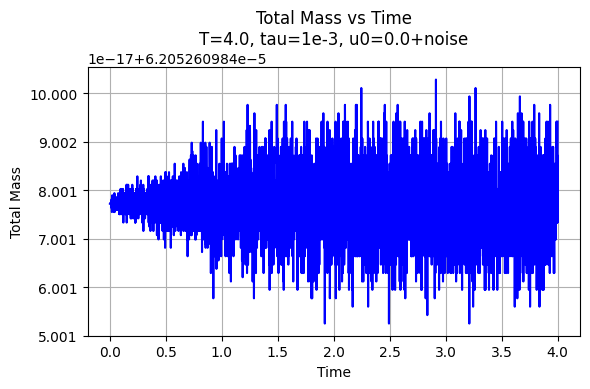

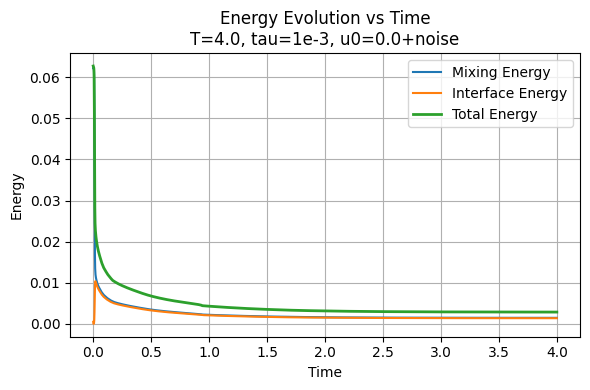

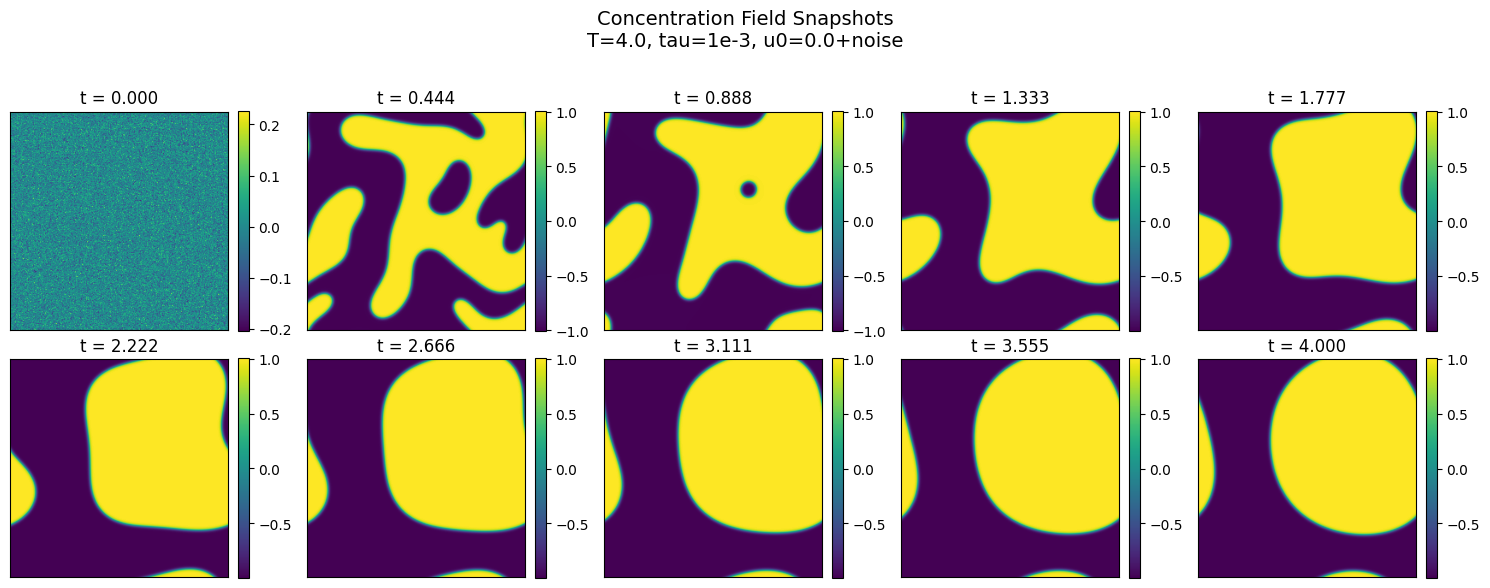

Running simulation: T=4.0, tau=1e-3, u0=-0.45+noise


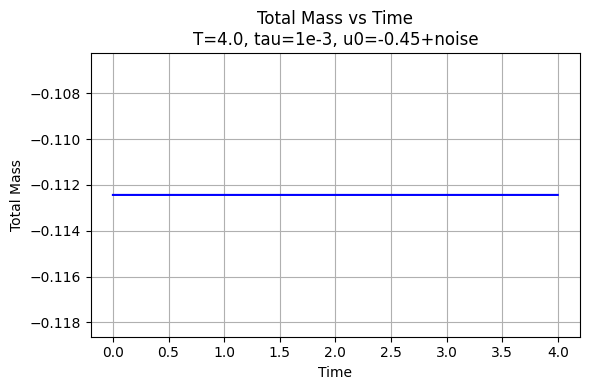

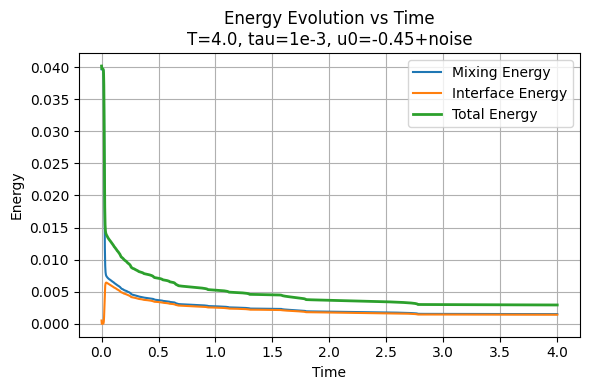

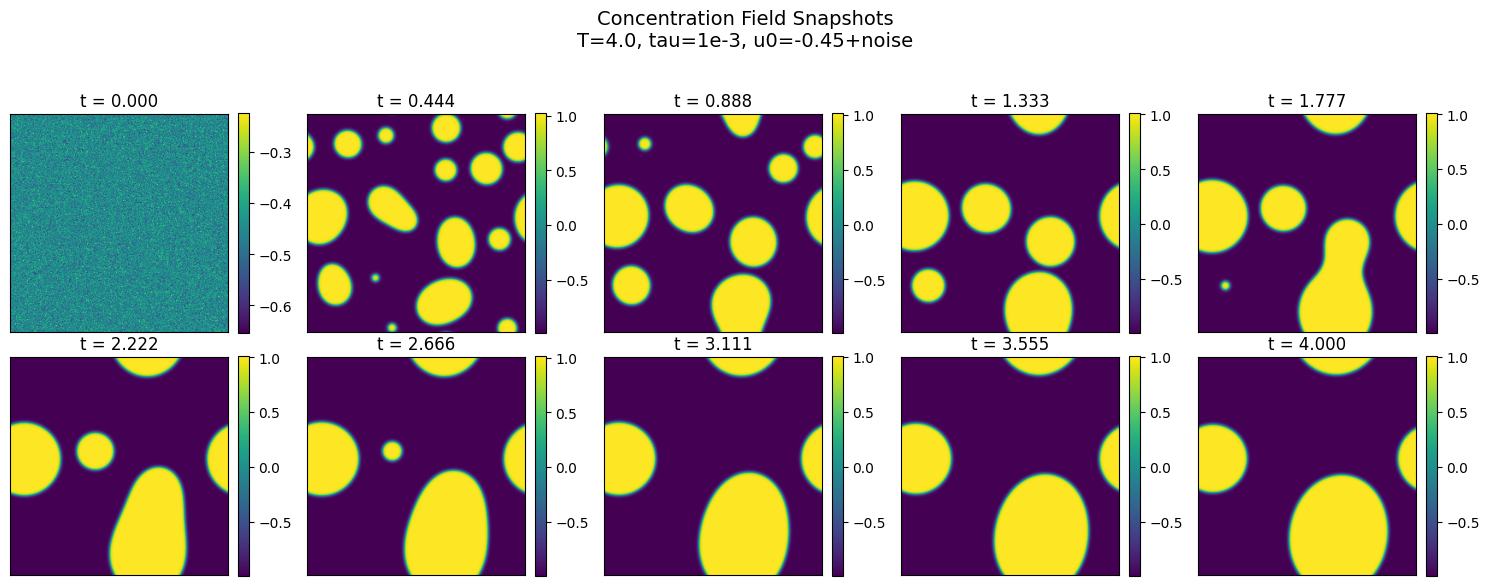

Running simulation: T=4.0, tau=1e-4, u0=0.0+noise


KeyboardInterrupt: 

In [7]:


def compute_mass(u, dx, dy):
    return np.sum(u) * dx * dy

def compute_energies(u, kappa, dx, dy):
    mixing = np.sum((u**2 - 1)**2 / 4) * dx * dy
    u_y, u_x = np.gradient(u, dy, dx)
    interface = np.sum(0.5 * kappa * (u_x**2 + u_y**2)) * dx * dy
    total = mixing + interface
    return mixing, interface, total


def run_simulation(T, tau, u0_base, description):
    """
    Runs one simulation of the Cahn–Hilliard equation.
    
    Parameters:
      T         : final time.
      tau       : time step size.
      u0_base   : base value for the initial condition (0.0 or -0.45).
      description: string describing the simulation (for plot titles).
    """
    # Domain and spatial resolution
    Nx = Ny = 256
    L = 0.5
    x = np.linspace(0, L, Nx, endpoint=False)
    y = np.linspace(0, L, Ny, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    
    # Parameters
    kappa = (0.0025)**2
    alpha = 1.5
    t0 = 0.0
    Nt = int((T-t0)/tau)
    
    # Set random seed and define initial condition
    rng = np.random.default_rng(12345)
    noise = 0.05
    U0 = np.full((Ny, Nx), u0_base) + noise * rng.standard_normal((Ny, Nx))
    
    # Storage for diagnostics.
    times = []
    mass_list = []
    mixing_list = []
    interface_list = []
    total_energy_list = []
    snapshots = []  # to store u at selected time steps

    # Decide snapshot indices (about 10 snapshots evenly spaced)
    snapshot_indices = set(np.linspace(0, Nt, num=10, endpoint=True, dtype=int))
    
    # Run the solver.
    solver = cahn_hilliard_backward_euler(kappa=kappa, X=X, Y=Y, U0=U0,
                                            t0=t0, T=T, Nt=Nt, g=None, alpha=alpha)
    for i, (U_hat, t) in enumerate(solver):
        # Recover u in physical space.
        u = np.real(ifft2(U_hat))
        times.append(t)
        mass_list.append(compute_mass(u, dx, dy))
        mix, interf, tot = compute_energies(u, kappa, dx, dy)
        mixing_list.append(mix)
        interface_list.append(interf)
        total_energy_list.append(tot)
        if i in snapshot_indices:
            snapshots.append((t, u))
    
    times = np.array(times)
    
    # Plot mass
    plt.figure(figsize=(6,4))
    plt.plot(times, mass_list, 'b-')
    plt.xlabel('Time')
    plt.ylabel('Total Mass')
    plt.title(f'Total Mass vs Time\n{description}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot energies
    plt.figure(figsize=(6,4))
    plt.plot(times, mixing_list, label='Mixing Energy')
    plt.plot(times, interface_list, label='Interface Energy')
    plt.plot(times, total_energy_list, label='Total Energy', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.title(f'Energy Evolution vs Time\n{description}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot snapshots
    n_snap = len(snapshots)
    ncols = 5
    nrows = int(np.ceil(n_snap / ncols))
    plt.figure(figsize=(3*ncols, 3*nrows))
    for j, (t_snap, u_snap) in enumerate(snapshots):
        plt.subplot(nrows, ncols, j+1)
        im = plt.imshow(u_snap, origin='lower', extent=[0, L, 0, L])
        plt.title(f"t = {t_snap:.3f}")
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(f'Concentration Field Snapshots\n{description}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    return times, mass_list, mixing_list, interface_list, total_energy_list, snapshots


# Run simulations for the different parameter combinations

configs = [
    {"T": 4.0, "tau": 1e-3, "u0_base": 0.0, "desc": "T=4.0, tau=1e-3, u0=0.0+noise"},
    {"T": 4.0, "tau": 1e-3, "u0_base": -0.45, "desc": "T=4.0, tau=1e-3, u0=-0.45+noise"},
    {"T": 4.0, "tau": 1e-4, "u0_base": 0.0, "desc": "T=4.0, tau=1e-4, u0=0.0+noise"},
    {"T": 4.0, "tau": 1e-4, "u0_base": -0.45, "desc": "T=4.0, tau=1e-4, u0=-0.45+noise"},
    {"T": 0.01, "tau": 1e-3, "u0_base": 0.0, "desc": "T=0.01, tau=1e-3, u0=0.0+noise"},
    {"T": 0.01, "tau": 1e-3, "u0_base": -0.45, "desc": "T=0.01, tau=1e-3, u0=-0.45+noise"},
    {"T": 0.01, "tau": 1e-4, "u0_base": 0.0, "desc": "T=0.01, tau=1e-4, u0=0.0+noise"},
    {"T": 0.01, "tau": 1e-4, "u0_base": -0.45, "desc": "T=0.01, tau=1e-4, u0=-0.45+noise"}
]

coeffs = {
    'alpha10': 2.0,
    'alpha11': -1.0,
    'alpha20': 0.5,
    'alpha21': 0.0,
    'alpha22': 0.5,
    'beta1': 1.0,
    'beta2': 1.0
}

for cfg in configs:
    print(f"Running simulation: {cfg['desc']}")
    run_simulation(T=cfg["T"], tau=cfg["tau"], u0_base=cfg["u0_base"], description=cfg["desc"])


In [ ]:

def run_simulation_IMEX(T, tau, u0_base, description, solver_func, coeffs=None):
    """
    Run one simulation of the Cahn–Hilliard equation with the given solver.
    
    Parameters:
      T          : Final time.
      tau        : Time step size.
      u0_base    : Base value for the initial condition.
      description: String used for plot titles.
      solver_func: The solver function to use.
      coeffs     : Dictionary of coefficients (if required by the solver).
    
    Returns:
      times, mass_list, mixing_list, interface_list, total_energy_list, snapshots.
    """

    Nx = Ny = 256
    L = 0.5
    x = np.linspace(0, L, Nx, endpoint=False)
    y = np.linspace(0, L, Ny, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    
    # Problem parameters
    kappa = (0.0025)**2
    alpha = 1.5
    t0 = 0.0
    Nt = int((T - t0) / tau)
    Nt = max(1, Nt)
    
    # Random seed
    rng = np.random.default_rng(12345)
    noise = 0.05
    U0 = np.full((Ny, Nx), u0_base) + noise * rng.standard_normal((Ny, Nx))
    
    times, mass_list = [], []
    mixing_list, interface_list, total_energy_list = [], [], []
    snapshots = []
    n_snapshots = min(10, Nt+1)
    snapshot_indices = set(np.linspace(0, Nt, num=n_snapshots, endpoint=True, dtype=int))
    
    # Run the solver. Here, we assume g = 0.
    solver = solver_func(kappa=kappa, X=X, Y=Y, U0=U0, t0=t0, T=T, Nt=Nt,
                           g=lambda X, Y, t: np.zeros_like(X), 
                           alpha=alpha, coeffs=coeffs)
    
    for i, (U_hat, t) in enumerate(solver):
        u = np.real(ifft2(U_hat))
        times.append(t)
        mass_list.append(compute_mass(u, dx, dy))
        mix, interf, tot = compute_energies(u, kappa, dx, dy)
        mixing_list.append(mix)
        interface_list.append(interf)
        total_energy_list.append(tot)
        if i in snapshot_indices:
            snapshots.append((t, u.copy()))
    times = np.array(times)
    
    # Plot mass
    plt.figure(figsize=(6,4))
    plt.plot(times, mass_list, 'b-', lw=2)
    plt.xlabel('Time')
    plt.ylabel('Total Mass')
    plt.title(f'Total Mass vs Time\n{description}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot energies
    plt.figure(figsize=(6,4))
    plt.plot(times, mixing_list, label='Mixing Energy')
    plt.plot(times, interface_list, label='Interface Energy')
    plt.plot(times, total_energy_list, label='Total Energy', lw=2)
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.title(f'Energy Evolution vs Time\n{description}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot snapshots
    ncols = 5
    nrows = int(np.ceil(len(snapshots) / ncols))
    plt.figure(figsize=(3*ncols, 3*nrows))
    for j, (t_snap, u_snap) in enumerate(snapshots):
        plt.subplot(nrows, ncols, j+1)
        im = plt.imshow(u_snap, origin='lower', extent=[0, L, 0, L], cmap='bwr')
        plt.title(f"t = {t_snap:.3f}")
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(f'Concentration Field Snapshots\n{description}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    return times, mass_list, mixing_list, interface_list, total_energy_list, snapshots


for cfg in configs:
    print(f"Running simulation: {cfg['desc']}")
    run_simulation_IMEX(T=cfg["T"], tau=cfg["tau"], u0_base=cfg["u0_base"], description=cfg["desc"], solver_func=cahn_hilliard_song_IMEX, coeffs=coeffs)



NameError: name 'configs' is not defined

In [8]:
import matplotlib.animation as animation

def run_simulation_and_create_animation(T, tau, u0_base, description, solver_func, **kwargs):
    Nx = Ny = 256
    L = 0.5
    x = np.linspace(0, L, Nx, endpoint=False)
    y = np.linspace(0, L, Ny, endpoint=False)
    X, Y = np.meshgrid(x, y, indexing='xy')
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    
    kappa = (0.0025)**2
    t0 = 0.0
    Nt = int((T - t0) / tau)
    Nt = max(1, Nt)


    rng = np.random.default_rng(12345)
    noise = 0.05
    U0 = np.full((Ny, Nx), u0_base) + noise * rng.standard_normal((Ny, Nx))
    
    snapshots = []

    snap_indices = set(np.linspace(0, Nt, num=4, endpoint=True, dtype=int))
    
    solver = solver_func(kappa=kappa, X=X, Y=Y, U0=U0, t0=t0, T=T, Nt=Nt,
                           g=lambda X, Y, t: np.zeros_like(X), **kwargs)
    
    for i, (U_hat, t) in enumerate(solver):
        if i in snap_indices:
            u = np.real(ifft2(U_hat))
            snapshots.append((t, u.copy()))
    
    fig, ax = plt.subplots(figsize=(5, 5))
    def update(frame):
        ax.clear()
        t_frame, u_frame = snapshots[frame]
        im = ax.imshow(u_frame, origin='lower', extent=[0, L, 0, L], cmap='bwr')
        ax.set_title(f"t = {t_frame:.3f}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        return im,

    solver_name = solver_func.__name__
    print(solver_name)
    ani = animation.FuncAnimation(fig, update, frames=len(snapshots), interval=200)
    ani.save(f'T={T}_{solver_name}.gif', writer="pillow", fps=5)
    plt.close(fig)
    print(f'Animation saved as T={T}_{solver_name}.gif.')
    return snapshots


# 4 snapshots of spinodal decomposition solved with cahn_hilliard_song_IMEX and cahn_hilliard_backward_euler
snapshots_1 = run_simulation_and_create_animation(T=0.003, tau=4.0/40000, u0_base=0.0,
                                                description="Phase Separation (T=4.0, 40000 steps)",
                                                solver_func=cahn_hilliard_song_IMEX,
                                                coeffs=coeffs)

snapshots_2 = run_simulation_and_create_animation(T=0.003, tau=4.0/40000, u0_base=0.0,
                                                description="Phase Separation (T=4.0, 40000 steps)",
                                                solver_func=cahn_hilliard_backward_euler)



# 4 snapshots of Ostwald ripening process solved with cahn_hilliard_song_IMEX and cahn_hilliard_backward_euler
snapshots_3 = run_simulation_and_create_animation(T=2.0, tau=4.0/40000, u0_base=0.0,
                                                description="Phase Separation (T=4.0, 40000 steps)",
                                                solver_func=cahn_hilliard_song_IMEX,
                                                coeffs=coeffs)

snapshots_4 = run_simulation_and_create_animation(T=2.0, tau=4.0/40000, u0_base=0.0,
                                                description="Phase Separation (T=4.0, 40000 steps)",
                                                solver_func=cahn_hilliard_backward_euler)



cahn_hilliard_song_IMEX
Animation saved as T=0.003_cahn_hilliard_song_IMEX.gif.
cahn_hilliard_backward_euler
Animation saved as T=0.003_cahn_hilliard_backward_euler.gif.


KeyboardInterrupt: 

## Task 6 discussion: 

We see that at temperatur below the critical temperature, the potential has its maximum at u = 0 (homogeneous mix) minima at u = +-1, meaning the system wants to separate into two distinct phases to get to the lowest potential. As the temperature gets closer to the critical temperature the potential flattens out and changes sign for u closer to zero, meaning the system separates less, and above this the potenital drops fast to u = 0 meaning the system will not tend to separate at all as the mix is then stable at u = 0.


We expect the total mass of the concentration field to stay constant, since mass is conserved, and there is no source or sink term (new matter cannot enter or leave the field). We see that with the second initial condition (-0.45 + noise), the mass stays practically constant for both time step sizes and time intervals. However we see here that the first initial condition is more unstable, as the numerical mass shows significnt variance, althogh the mean value still seems to stay roughly the same. The variance decreases when we shorthen the time interval, but is still relatviely significant for tau = 10^-4. This can be explained by the shape of the potential $F = 1/4*(u^2 - 1)^2$ which has minimum for u = +-1 and maximum for u = 0. An initital condition of u = zero means the system starts of at the top of the energy scale, completely biases towards one phase, which is a very unstable state. This leads to very rapid initial phase separation (spinodal decomposition), leading to less accurate numerical results. Here we are approximating an integral of a solution which we see changes rapidly in space (at the inerfaces) with a sum, which might easily lead to noticeable errors. Knowing the solution is mass conservative, we see that our results are still reasonable considering this. With the initital condition -0.45 + noise, the system is already somewhat phase separated, and the system takes longer to evolve, meaning the numerical method will show more accuracy.

Evolution of energy: With the longer time interval, the overall trend looks visually about the same for all of the situations. However, when we zoom in by only looking at times to T = 0.01, it seems that we might want a smaller step size than 10^-3, since the changes occur earlier with tau = 10^-4. The mixing energy describes the tendency of the system to separate into different phases. It is therefore initially high in a more homogeneous state and decreases as the system phase-separates. During spinodal decomposition, this energy rapidly decreases as structures form. The interface energy is associated with the sharp phase boundaries. We see it increases initially, which makes sense because new interfaces develop, and then starts decreasing as coarsening occurs (ostwald ripening) and the total interfacial area is reduced. The total energy should decrease towards a minimum with time, since we know physically that the system will mimimize its free energy, which is what we observe. We see that the solution starting at 0 + noise reaches equllibrium faster than when the system starts of completely biased towards one phase. This happens for the same reason as explained above.

How does solver choice influence the evolution of the energies and the snapshots:
The Backward Euler solver gets more smeared snapshots compared to the IMEX solver. The IMEX solver are more precise and captures the separation between the early spinodal decomposition better. 
Both solvers eventually produce similar overall energy evolutions, but it takes a little longer time for the Backward Euler solver to converge. This is because the Backward Euler method is more diffusive, meaning it is worse at capturing the sharp gradients in the real solution, and this also slows down the evolution of the solution. Also, we have seen that the IMEX solver we use is second order accurate in time, while the backward euler is only first order accurate. The IMEX solver, treats the linear terms implicitly but the nonlinear terms explicitly. This balance often allows the scheme to capture fast dynamics more accurately with less numerical diffusion. Hence, the IMEX solver converges faster in the sense that it reaches the reduced-energy state more quickly, capturing sharper interfaces and a more faithful evolution of the system.
The mass is conserved in both solvers.


The spinal decomposition is only visible in the very early stages, and is seen here on the shorter time intervals. It seems as a time step of 10^-3 is not suffiently small, as we see that when reduced the system evolves signifcantly faster, as we see that clear patterns and bubbles form also even in the early stages before t = 0.01. Our results suggest that spinodal decomposition occurs for t < T_sd ≈ 0.003, followed by the ostwald ripening, characterized by the formation of larger and clear structures and slower changes. This is also seen in the energy plots, as the energy after the spinodal decompostion starts decreasing very slowly. In our plots, the structures seem to stabilize at t between 2 and 4, buth with the initital condition 0.45 + noise the solution clearly changes also at the last snapshot. Even though the total energy stabilizes relativelt quickly (after the spinodal decomposition), we see from the first snapshots ranging from t = 0 to t = 4, that the ostwald ripening continues at much larger time scales (as in seconds compared to milliseconds).

## AI Declaration

We have actively utilized AI to assist in verifying our implementations, detecting potential errors, and suggesting improvements to optimize performance. We had an orignal runtime of 6 hours, so this was much needed. Another example was for plotting the results in Task 2 and creating a gif animation in Task 6. 